In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from scipy.ndimage import distance_transform_edt
# from skimage.morphology import ball, dilation, erosion
import matplotlib.pylab  as plt
# from scipy.spatial import distance
# from skimage import morphology
# from skimage import measure
# from scipy.ndimage.measurements import label
# from skimage.filters import threshold_otsu
# import cv2
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import random
import scipy.ndimage as ndimage
import pandas as pd

In [3]:
import seaborn as sns
sns.__version__

'0.11.2'

In [4]:
from skimage.measure import marching_cubes_lewiner
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [5]:
# For anatomical 3d
file_path = 'Predicted/'
files  =  os.listdir(file_path)
files_mri  = [file for file in files if  file.endswith('.npy')]
files_mri = sorted(files_mri)
predicted_mri  = [file_path + '/' + file for file in files_mri]

# For ground truth
file_path_gt = 'ground_truth/'
files  =  os.listdir(file_path_gt)
files_gt  = [file for file in files if  file.endswith('.npy')]
files_gt = sorted(files_gt)
volume_gt  = [file_path_gt + '/' + file for file in files_gt]

In [6]:
def padding(data1, thickness):
    data = data1.copy()
    thick = thickness
    thickh = int(thick/2)
    xend1, yend1, zend1 = data1.shape
    xend, yend, zend = xend1 +thick, yend1+thick, zend1+thick
    data = np.zeros((xend, yend, zend))
    xlim, ylim, zlim = xend1+thickh, yend1+thickh, zend1+thickh
    data[thickh:xlim, thickh:ylim,thickh:zlim] = data1
    return data

In [7]:
def compute_class_sens_spec(pred, label):
 
    class_pred  = pred.copy()
    class_label = label.copy()

    # compute true positives, false positives, 
    # true negatives, false negatives
    tp = np.sum((class_pred == 1) & (class_label == 1))
    tn = np.sum((class_pred == 0) & (class_label == 0))
    fp = np.sum((class_pred == 1) & (class_label == 0))
    fn = np.sum((class_pred == 0) & (class_label == 1))

    # compute sensitivity and specificity
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    JI          = tp/(tp + fp + fn)
    DSC         = 2*tp/(2*tp + fp + fn)
    precion     = tp/(tp+fp)
    accuracy    = (tp+tn)/(tp+fp+fn+tn)

    return JI, DSC, sensitivity, specificity, precion, accuracy

In [8]:
JI_c, DSC_c, sensit_c, specif_c, Precion, Accuracy = [], [],[],[],[],[]
for i in range(len(predicted_mri)):
    image_volume = np.load(predicted_mri[i])
    image_mask   = np.load(volume_gt[i])
    pred_mask = image_volume >0
    mask = image_mask >0
    JI, DSC, sensit, specif, precion, accuracy = compute_class_sens_spec(pred_mask, mask)
#     JI, DSC, sensit, specif = JI, DSC, sensit, specif
    JI_c.append(JI); DSC_c.append(DSC)
    sensit_c.append(sensit); specif_c.append(specif)
    Precion.append(precion); Accuracy.append(accuracy)

In [9]:
len(JI_c), len(DSC_c), len(sensit_c), len(specif_c), len(Precion), len(Accuracy)

(115, 115, 115, 115, 115, 115)

In [10]:
np.mean(JI_c), np.mean(DSC_c), np.mean(sensit_c), np.mean(specif_c), np.mean(Accuracy), np.mean(Precion)

(0.8894225429882896,
 0.9408772451977028,
 0.9423449282962717,
 0.9795997231859896,
 0.97029041207355,
 0.9406556461883533)

In [11]:
np.std(JI_c), np.std(DSC_c), np.std(sensit_c), np.std(specif_c),  np.std(Accuracy), np.std(Precion)

(0.04568508499197075,
 0.02474896014757863,
 0.03325933058676072,
 0.013126220881802105,
 0.012760726002184366,
 0.03529997685317482)

In [12]:
bwlabels, ibsrlabels, oasislabels = [], [], []
bwdata, ibsrdata, oasisdata = [], [], []
for i in range(20):
    bwlabels.append('red')
    bwdata.append('BW')
for i in range(18):
    ibsrlabels.append('blue')
    ibsrdata.append('IBSR')
for i in range(77):
    oasislabels.append('green')
    oasisdata.append('OASIS')

In [13]:
labels = bwlabels+ibsrlabels+oasislabels
datac  = bwdata + ibsrdata +oasisdata

In [14]:
# df = pd.DataFrame([Accuracy, JI_c, DSC_c, sensit_c, specif_c, Precion,  labels, datac])
df = pd.DataFrame([Accuracy, DSC_c, sensit_c, specif_c, Precion,  labels, datac])

In [15]:
df = df.T

In [16]:
df  = pd.DataFrame.to_numpy(df)

In [17]:
# df = pd.DataFrame(df, columns = ['Accuracy','JI', 'DSC', 'Sens', 'Spec','Precion',  'labels','datac'])
df = pd.DataFrame(df, columns = ['Accuracy', 'DSC', 'Sens', 'Spec','Precion',  'labels','datac'])

In [18]:
markers = ['^', 'o', 's']
colors = ['red', 'y', 'blue']

Text(0.5, 1.01, 'Pair Plot of different measures of similarity for three data sets')

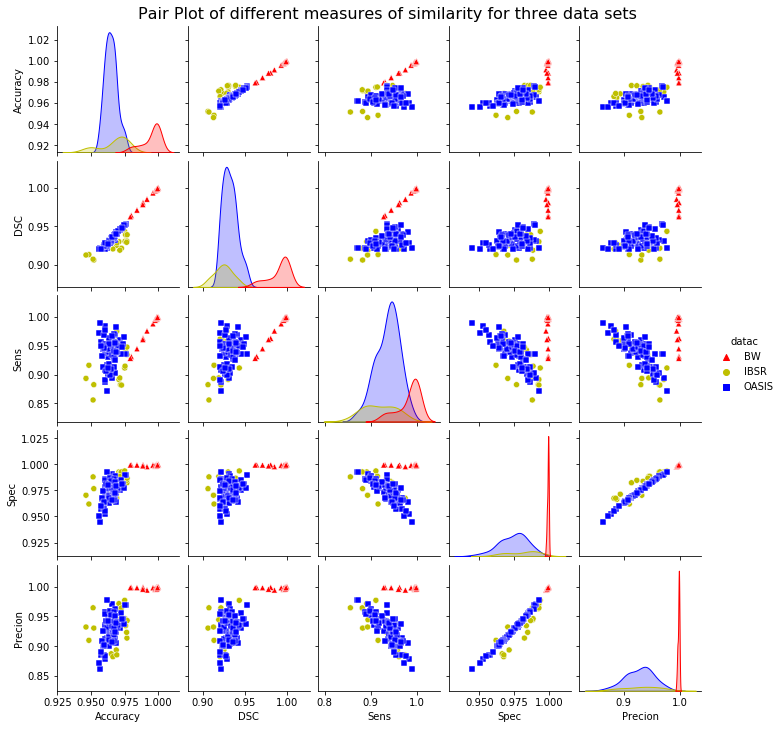

In [19]:
sns.pairplot(df,  hue = 'datac', markers= markers, palette =  colors, size = 2)
plt.suptitle('Pair Plot of different measures of similarity for three data sets', size = 16, y=1.01)
# plt.savefig('pairplots.png', bbox_inches='tight')

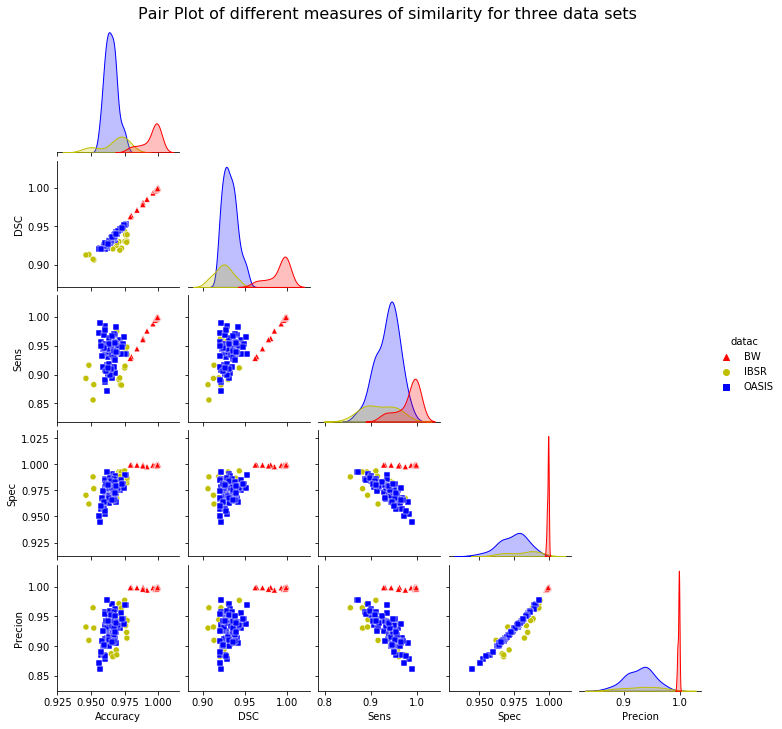

In [20]:
sns.pairplot(df,  hue = 'datac', markers= markers, palette =  colors, size = 2, corner=True)
plt.suptitle('Pair Plot of different measures of similarity for three data sets', size = 16, y=1.01)
plt.savefig('pairplots.png', bbox_inches='tight')

In [21]:
colorss = ['y', 'y', 'y', 'y','y','y']

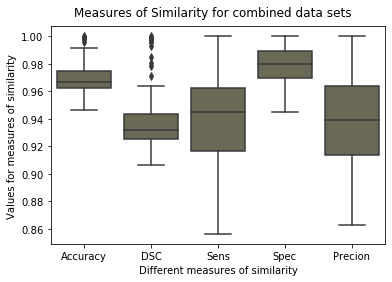

In [22]:
# sns.set(style = 'ticks')
sns.boxplot(data = df, palette = colorss, saturation=0.1)
plt.suptitle('Measures of Similarity for combined data sets', fontsize = '12',y=.95)
plt.xlabel('Different measures of similarity')
plt.ylabel('Values for measures of similarity')
plt.savefig('boxplots.png', bbox_inches='tight')

In [23]:
df1, df2, df3 = df[:20], df[20:38], df[38:]

In [24]:
df1.shape, df2.shape, df3.shape

((20, 7), (18, 7), (77, 7))

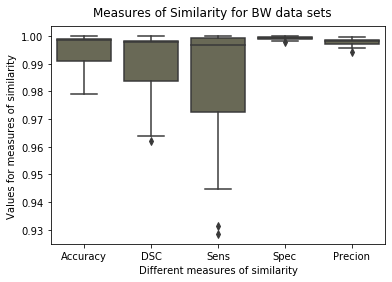

In [25]:
# sns.set(style = 'ticks')
sns.boxplot(data = df1, palette=colorss, saturation=0.1)
plt.suptitle('Measures of Similarity for BW data sets', fontsize = '12',y=.95)
plt.xlabel('Different measures of similarity')
plt.ylabel('Values for measures of similarity')
plt.savefig('boxplotsdf1.png', bbox_inches='tight')

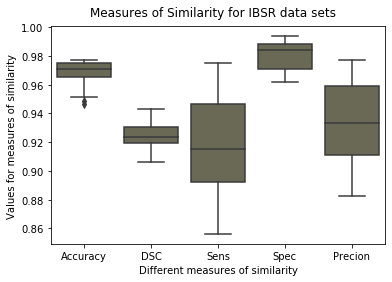

In [26]:
# sns.set(style = 'ticks')
sns.boxplot(data = df2, palette=colorss, saturation=0.1)
plt.suptitle('Measures of Similarity for IBSR data sets', fontsize = '12',y=.95)
plt.xlabel('Different measures of similarity')
plt.ylabel('Values for measures of similarity')
plt.savefig('boxplotsdf2.png', bbox_inches='tight')

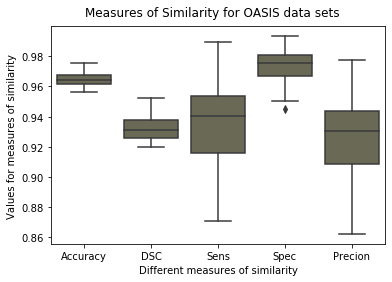

In [27]:
# sns.set(style = 'ticks')
sns.boxplot(data = df3, palette=colorss, saturation=0.1)
plt.suptitle('Measures of Similarity for OASIS data sets', fontsize = '12',y=.95)
plt.xlabel('Different measures of similarity')
plt.ylabel('Values for measures of similarity')
plt.savefig('boxplotsdf3.png', bbox_inches='tight')

In [28]:
# COMBINED RESULTS BAR PLOTS